<a href="https://colab.research.google.com/github/nupur3101/InternshipStudio/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project : Marketing Campaign for Banking Products**

**Objective:**<br>
The classification goal is to predict the likelihood of a liability customer buying personal
loans.

**a. Importing the libraries**

In [209]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,classification_report


**b. Importing the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [98]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))
dataset.head(10) # to display the top 10 rows of dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


There are 12 features. The aim is to construct a model that can identify potential customers who have a higher probability of purchasing loan. Output column is Personal Loan. Features are detailed below:

**Age** :    Customer's age<br>
**Experience** :    Number of years of professional experience<br>
**Income** :    Annual income of the customer<br>
**ZIPCode** :    Home Address ZIP code<br>
**Family** :    Family size of the customer<br>
**CCAvg** :    Average spending on credit cards per month<br>
**Education** :    Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional<br>
**Mortgage** :    Value of house mortgage if any<br>
**Securities Account** :    Does the customer have a securities account with the bank?<br>
**CD Account** :    Does the customer have a certificate of deposit (CD) account with the bank?<br>
**Online** :    Does the customer use internet banking facilities?<br>
**CreditCard** :    Does the customer uses a credit card issued by UniversalBank?<br>
**Personal Loan** :    Did this customer accept the personal loan offered in the last campaign?

In [ ]:
# To display last 5 rows 
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**c. Checking datatype and basic summary stats**

In [ ]:
# To see the shape of the data i.e., (rows,columns)
dataset.shape

(5000, 14)

In [ ]:
# To display the datatype of each column and also display the number of non-null rows for each column 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Through this we can see that our data contains 5000 rows and none of them have any missing value.
All our columns datatypes are also numerical.

In [ ]:
# Here we can see the statistical summary of the data which includes : count, max, min, mean, standard deviation, etc.
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Here, we can analyze the data by observing min-max value for each column. <br>
As we know, Experience cannot be negative, hence we have to perform some data cleaning.

In [ ]:
# To display null-values(if any) in each column
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# **2. Check if you need to clean the data for any of the variables**


**a. Dropping irrelevant columns**

> After analyzing the columns and considering the model we’re trying to build, we conclude that ID column is a randomly generated field for unique identification purpose only and it does not effect the chances of customer taking loan or not.<br>
Hence, we are dropping ID column.



In [99]:
# axis = 1 implies that we are looking for 'coloumn' named ID

dataset.drop('ID',axis=1, inplace=True)   # inplace=True will make changes in the dataset itself
dataset.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**b. Data Cleaning**

In [100]:
# Since Experience cannot be negative (i.e., we have faulty data) so here we will replace all -ve Experience values with the median

dataset.Experience.mask(dataset.Experience < 0, dataset.Experience.median(), inplace=True)
(dataset.Experience < 0).sum()

# Now there are no values in Experience column which are negative

0

# 3. EDA (Exploratory Data Analysis)

Now, we inspect the linear correlations between features. Pandas corr function is used to compute correlation matrix and Seaborn heatmap is used for plotting. Correlation is in interval [-1,1], so our colorbar is.

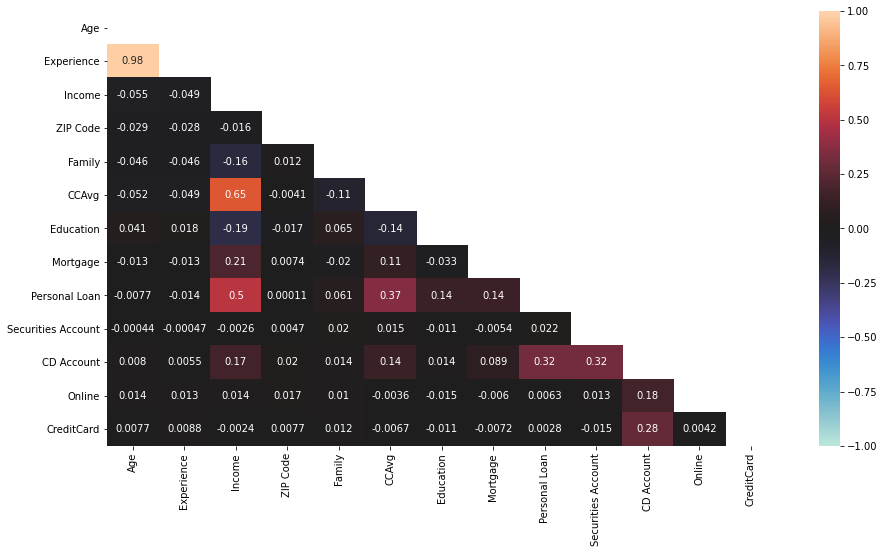

In [101]:
corr_matrix = dataset.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="icefire");

Age and Experience features have very high correlation, 0.98. It is understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models. Hence, we drop Experience feature.

In [102]:
dataset.drop('Experience',axis=1, inplace=True)
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


**a. Number of unique in each column**

In [103]:
# This will tell us the total number of unique values in each column
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

There is one special case about ZIP Code feature. Although it seems to be numeric, it is categorical. Different ZIP codes indicates different addresses. If we look at the number of unique values it takes, we see a very high number(467). So instead of applying OneHot Encoding which will result in 466 additional columns, we just simply drop the ZIP Code column.

In [104]:
dataset.drop('ZIP Code',axis=1, inplace=True)
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**b. Number of people with zero mortgage**

In [ ]:
(dataset.Mortgage == 0).sum()

3462

**c. Number of people with zero credit card spending per month**

In [ ]:
(dataset.CCAvg == 0).sum()

106

**d. Value counts of all categorical columns**

In [ ]:
# Value count of Family
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
# Value count of Education
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
# Value count of Securities Account
dataset['Securities Account'].value_counts()    #Securities Account is a binary categorical feature

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
# Value count of CD Account
dataset['CD Account'].value_counts()    #CD Account is a binary categorical feature


0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
# Value count of Online
dataset.Online.value_counts()      #Online is a binary categorical feature

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
# Value count of Credit Card
dataset.CreditCard.value_counts()     #CreditCard is a binary categorical feature

0    3530
1    1470
Name: CreditCard, dtype: int64

### **e. Univariate Analysis**

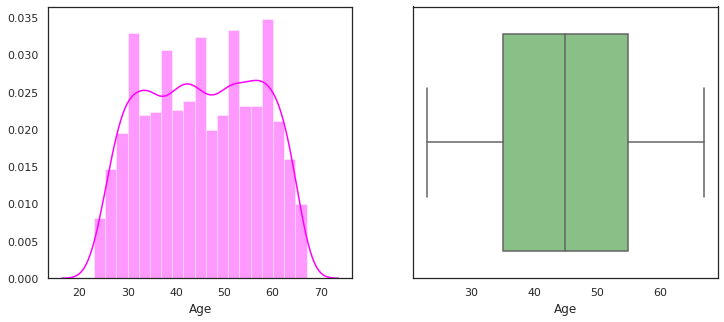

In [ ]:

# Checking for outliers in Age 

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.distplot(dataset["Age"], ax=axes[0], color = 'magenta');
sns.boxplot(dataset["Age"], palette="Accent", ax=axes[1]);

#There aren't any outliers for Age.

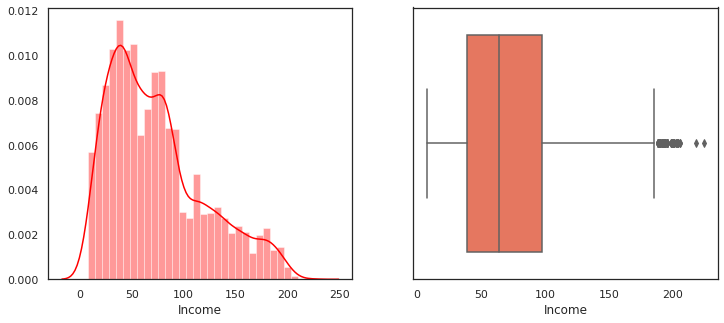

In [ ]:
# Checking for outliers in Income


fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.distplot(dataset.Income, ax=axes[0], color = 'red');
sns.boxplot(dataset.Income, palette="Reds", ax=axes[1]);


#Distribution of Income is right skewed. So we will have to apply transformations to this feature.

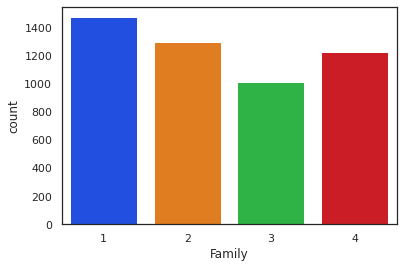

In [ ]:
# Checking for outliers in Family
sns.countplot(dataset.Family, palette='bright');

#No outliers in Family

Most of the customers are single.

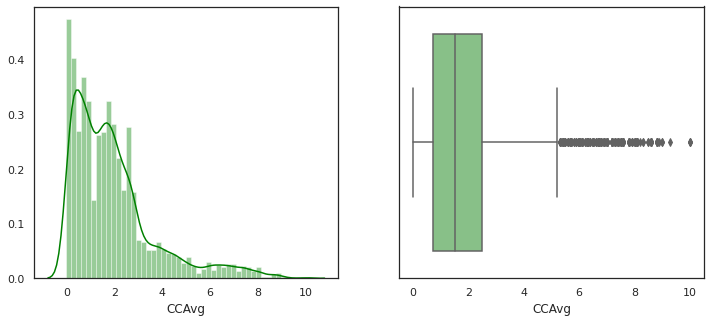

In [ ]:
# Checking for outliers in CCAvg


fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.distplot(dataset.CCAvg, ax=axes[0], color = 'green');
sns.boxplot(dataset.CCAvg, palette="Accent", ax=axes[1]);

# CCAvg is also skewed right so we will have to apply transformations on it.

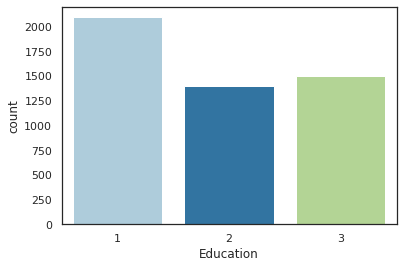

In [ ]:
# Checking for outliers in Education

sns.countplot(dataset.Education, palette='Paired');

# There aren't any outliers for Education feature.

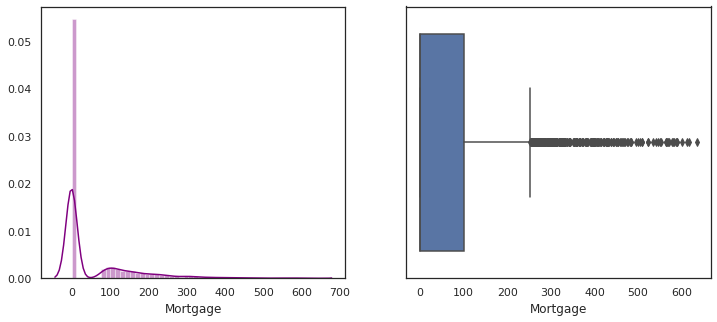

In [ ]:
# Checking for outliers in Mortgage


fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.distplot(dataset.Mortgage, ax=axes[0], color = 'purple');
sns.boxplot(dataset.Mortgage, ax=axes[1]);

# The graph below infers that a lot of customers doesn't have mortgage and the right side of the distribution is almost flat.

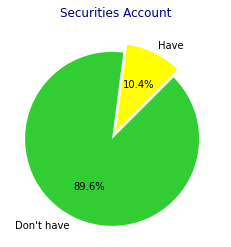

0    4478
1     522
Name: Securities Account, dtype: int64


In [ ]:
# Visualization of Securities Account
labels = 'Have','Don\'t have' 
sizes = [(dataset['Securities Account']==1).sum(), (dataset['Securities Account']==0).sum()]
explode = (0, 0.1) 
color = ('yellow', 'limegreen')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=45, colors=color)
plt.title('Securities Account', color = 'navy')
plt.show()
print(dataset['Securities Account'].value_counts())

Only 522 customers have Securities Account, that is 10.4% people.

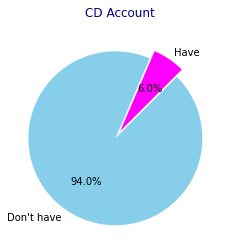

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
# Visualization of Certificate of Deposits (CD) Account
labels = 'Have','Don\'t have' 
sizes = [(dataset['CD Account']==1).sum(), (dataset['CD Account']==0).sum()]
explode = (0, 0.1) 
color = ('magenta', 'skyblue')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=45, colors=color)
plt.title('CD Account', color = 'navy')
plt.show()
dataset['CD Account'].value_counts()

out of 5000 customers, only 6% i.e. 302 people have CD Account.

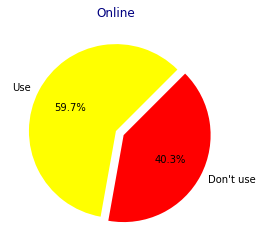

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
# Visualization of how many customers use internet banking facilities
labels = 'Use','Don\'t use' 
sizes = [(dataset.Online==1).sum(), (dataset.Online==0).sum()]
explode = (0, 0.1) 
color = ('yellow', 'red')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=45, colors=color)
plt.title('Online', color = 'navy')
plt.show()
dataset['Online'].value_counts()

A majority of customers i.e. 59.7% avail the online facilities of bank.

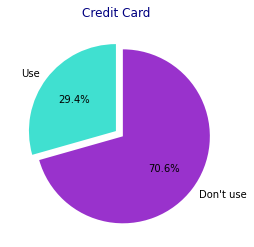

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
# Visualization of Number of customers using Credit Cards
labels = 'Use','Don\'t use' 
sizes = [(dataset['CreditCard']==1).sum(), (dataset['CreditCard']==0).sum()]
explode = (0, 0.1) 
color = ('turquoise', 'darkorchid')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=color)
plt.title('Credit Card', color = 'navy')
plt.show()
dataset['CreditCard'].value_counts()

29.4% of customers use the Credit Card Facility.

### **Multivariate Analysis**

In the graphs below, <br>
0 => Personal Loan not taken<br>
1 => Personal Loan taken

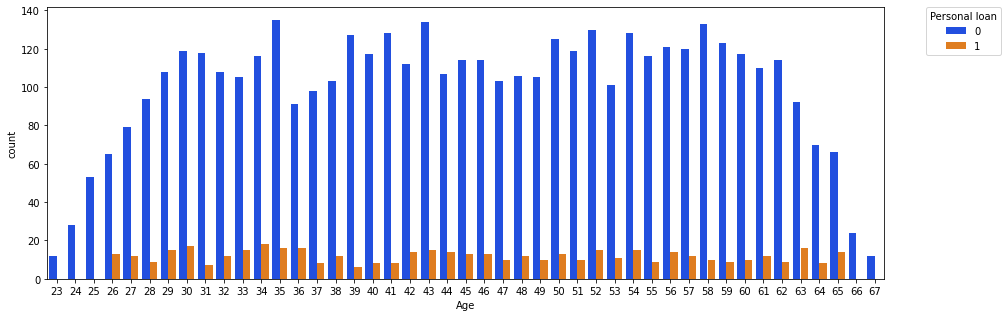

In [ ]:
fig = plt.subplots(figsize=(15,5))
sns.countplot(x="Age",hue="Personal Loan", data = dataset, palette='bright');
plt.legend(title='Personal loan', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

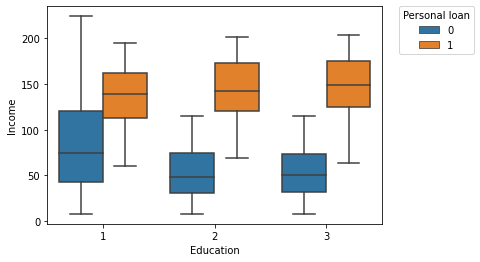

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset);
plt.legend(title='Personal loan', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

It tells us that people having income above 100\$ have availed loan facilites more than that having income below 100\$

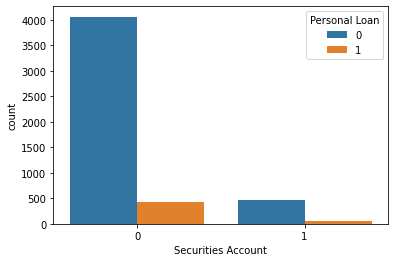

In [ ]:
sns.countplot(x="Securities Account",hue="Personal Loan", data = dataset);

People not having Securities Account have taken loan more than that having the account.

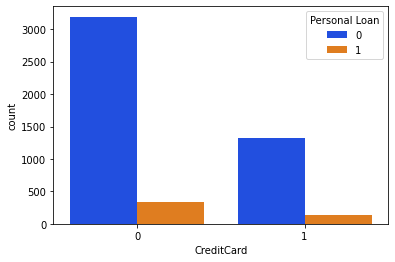

In [ ]:
sns.countplot(x="CreditCard",hue="Personal Loan", data = dataset, palette='bright');

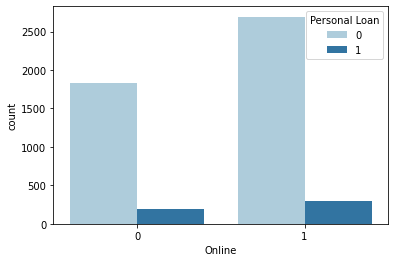

In [ ]:
sns.countplot(x="Online",hue="Personal Loan", data = dataset, palette='Paired');

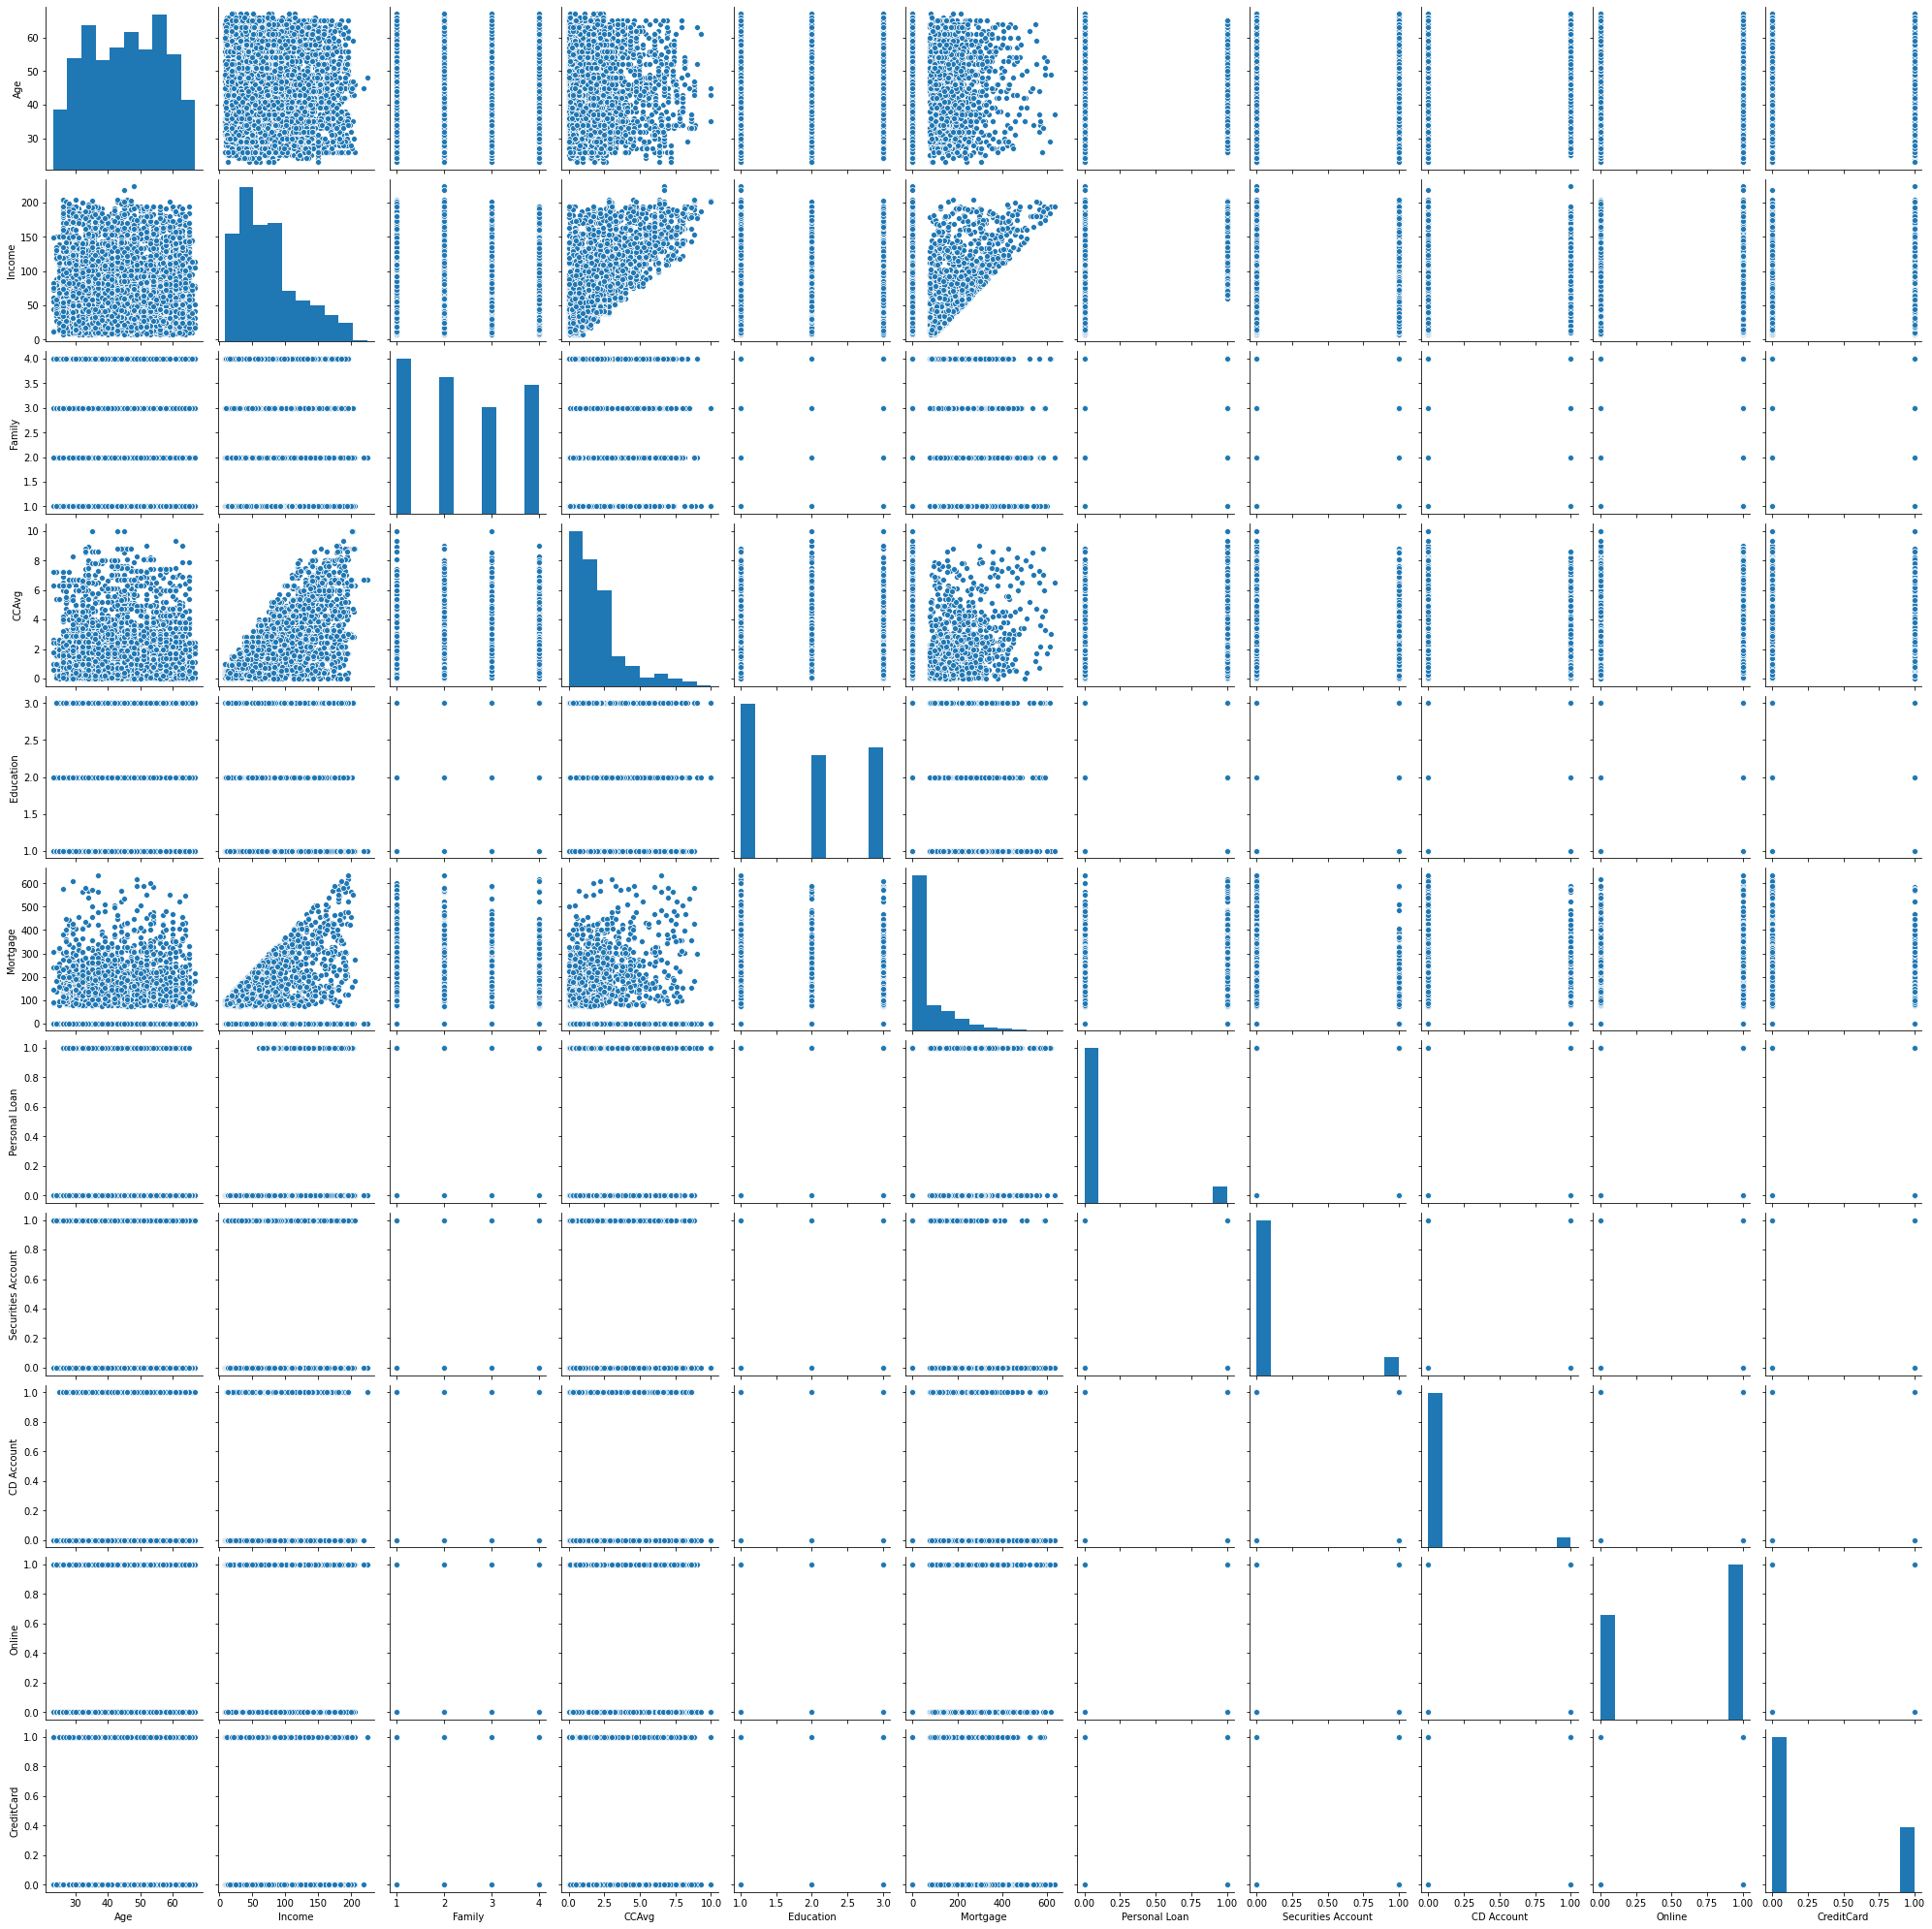

In [72]:
# Pairplot describes relation of each feature with all others 
sns.pairplot(dataset);

**Distributing the feature variables and target variable**

In [105]:
X = dataset.iloc[:, dataset.columns != "Personal Loan"]
y = dataset[["Personal Loan"]]

In [106]:
X.head()   #feature variables

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


In [107]:
y.head()  # target variable

,Personal Loan
0,0
1,0
2,0
3,0
4,0


# **Applying Transformations**

**a. Applying transformation on Income**

In scikit-learn, PowerTransformer can be used with methods Box-Cox and Yeo-Johnson. This time we use Yeo-Johnson. The resulting distribution and its box plot is depicted below.

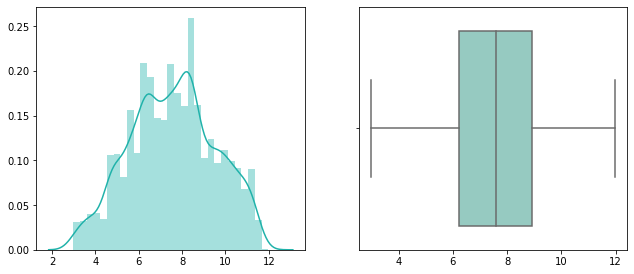

In [108]:
# disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(X["Income"].values.reshape(-1, 1))

temp = pt.transform(X["Income"].values.reshape(-1, 1))
X["Income"] = pd.Series(temp.flatten())

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(temp, ax=axes[0], color='lightseagreen');
sns.boxplot(temp, palette="Set3", ax=axes[1])
fig.tight_layout(pad=5.0)

Now, as we can see Income feature has been transformed and does not contain outliers.

**b. Applying transformation on CCAvg**

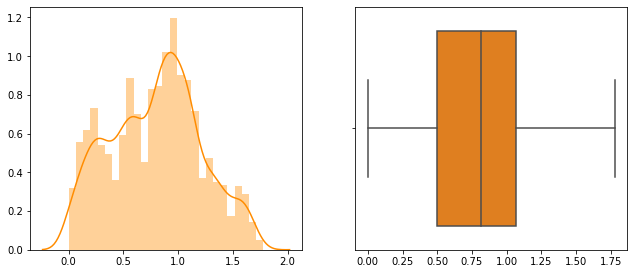

In [109]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(X["CCAvg"].values.reshape(-1, 1))

temp = pt.transform(X["CCAvg"].values.reshape(-1, 1))
X["CCAvg"] = pd.Series(temp.flatten())

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(temp, ax=axes[0], color = 'darkorange');
sns.boxplot(temp, palette="Set1_r", ax=axes[1])
fig.tight_layout(pad=5.0)

CCAvg feature has also been transformed.

**c. Applying transformation on Mortgage**

An ordinal categorical feature Mortgage_Int using Mortgage feature is created using **binning**. Then we drop Mortgage feature.

In [115]:
print("Minimum Mortgage value : ",X.Mortgage.min())
print("Maximum Mortgage value : ",X.Mortgage.max())

Minimum Mortgage value :  0
Maximum Mortgage value :  635


Since minimum and maximum Mortgage values are 0 and 635 respectively, so we will make bins upto 700 with size of each bin being 100.

In [117]:
X["Mortgage_Int"] = pd.cut(X["Mortgage"],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)

X.drop("Mortgage", axis=1, inplace=True)

X.Mortgage_Int.describe()

count     5000
unique       7
top          0
freq      3744
Name: Mortgage_Int, dtype: int64

**Standardization**

In [118]:
sc = StandardScaler()
X = sc.fit_transform(X)

# **5. Splitting into training and test data**

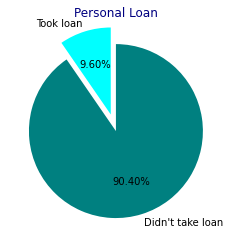

0    4520
1     480
Name: Personal Loan, dtype: int64

In [119]:
labels = ['Took loan', 'Didn\'t take loan'] 
sizes = [(y['Personal Loan']==1).sum(), (y['Personal Loan']==0).sum()]
explode = (0.2, 0) 
color = ('aqua', 'teal')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90, colors=color)
plt.title('Personal Loan', color = 'navy')
plt.show()
y['Personal Loan'].value_counts()

There are 2 classes and class ratio is approximately 1:9 which means our dataset is imbalanced.

Dataset is divided into 2 as train and test. We use stratify parameter of train_test_split function to get the same class distribution across train and test sets.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [124]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 10), (1500, 10), (3500, 1), (1500, 1))

# **6. Logistic Regression Model**

In [125]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred = model.predict(X_test)

In [134]:
# Mean Accuracy 
model.score(X_test,y_test)

0.9546666666666667

# **Metrices for evaluating model performance**

a. Confusion Matrix


In [129]:
# Function to draw confusion matrix
def draw_cm(original, predicted):
  cm = confusion_matrix(original, predicted)
  sns.heatmap(cm, annot=True, fmt='1.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel('Original')
  plt.xlabel('Predicted')
  plt.show()

Confusion Matrix for Logistic Regression Model


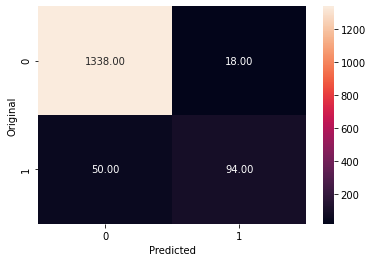

None


In [131]:
print("Confusion Matrix for Logistic Regression Model")
print(draw_cm(y_test, y_pred))

In [140]:
print("Training set accuracy : ",accuracy_score(y_train,model.predict(X_train)))

Training set accuracy :  0.9568571428571429


In [141]:
print("Test set accuracy : ",accuracy_score(y_test,y_pred))

Test set accuracy :  0.9546666666666667


In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.84      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [144]:
print("Roc Auc score : ",roc_auc_score(y_test, y_pred))

Roc Auc score :  0.819751720747296


We have got 95% accuracy on both train and test data set using logistic regression model

# **Step 8**

**a. Decision Tree Classifier**

In [162]:
model_dtc = DecisionTreeClassifier(max_depth=8)
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [163]:
y_pred_dtc = model_dtc.predict(X_test)

Confusion Matrix for Decision Tree Classifier Model


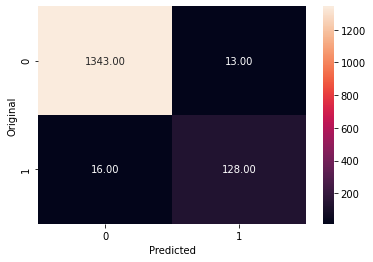

None


In [180]:
print("Confusion Matrix for Decision Tree Classifier Model")
print(draw_cm(y_test, y_pred_dtc))

In [179]:
print("Training set accuracy : ",accuracy_score(y_train,model_dtc.predict(X_train)))
print("Test set accuracy : ",accuracy_score(y_test,y_pred_dtc))

Training set accuracy :  0.9957142857142857
Test set accuracy :  0.9806666666666667


In [181]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.89      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [182]:
print("Roc Auc score : ",roc_auc_score(y_test, y_pred_dtc))

Roc Auc score :  0.9396509341199606


We have got 99% accuracy on train set and 98% accuracy on test set in Decision Tree Classifier

**b. Random Forest Classifier**

In [193]:
model_rfc = RandomForestClassifier(n_estimators=500, random_state=0, max_depth=5)
model_rfc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [194]:
y_pred_rfc = model_rfc.predict(X_test)

Confusion Matrix for Random Forest Classifier Model


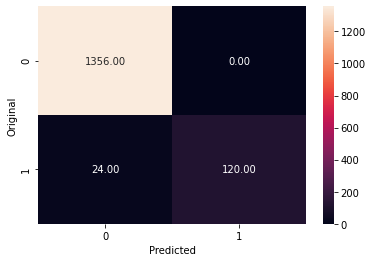

None


In [195]:
print("Confusion Matrix for Random Forest Classifier Model")
print(draw_cm(y_test, y_pred_rfc))

In [196]:
print("Training set accuracy : ",accuracy_score(y_train,model_rfc.predict(X_train)))
print("Test set accuracy : ",accuracy_score(y_test,y_pred_rfc))

Training set accuracy :  0.986
Test set accuracy :  0.984


In [198]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       1.00      0.83      0.91       144

    accuracy                           0.98      1500
   macro avg       0.99      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [199]:
print("Roc Auc score : ",roc_auc_score(y_test, y_pred_rfc))

Roc Auc score :  0.9166666666666667


By Random Forest Classifier we have got around 98% accuracy for both train and test data.

**c. Naive Bayes Classifier**

In [202]:
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [204]:
y_pred_nb = model_nb.predict(X_test)

Confusion Matrix for Naive Bayes Model


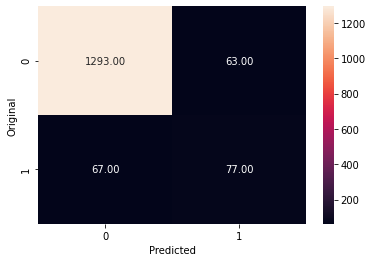

None


In [205]:
print("Confusion Matrix for Naive Bayes Model")
print(draw_cm(y_test, y_pred_nb))

In [206]:
print("Training set accuracy : ",accuracy_score(y_train,model_nb.predict(X_train)))
print("Test set accuracy : ",accuracy_score(y_test,y_pred_nb))

Training set accuracy :  0.9085714285714286
Test set accuracy :  0.9133333333333333


In [207]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.55      0.53      0.54       144

    accuracy                           0.91      1500
   macro avg       0.75      0.74      0.75      1500
weighted avg       0.91      0.91      0.91      1500



In [208]:
print("Roc Auc score : ",roc_auc_score(y_test, y_pred_nb))

Roc Auc score :  0.7441310226155359


By Naive Bayes Classifier we have got around 90% accuracy for train and 91% accuracy for test data.

**d. K Nearest Neighbors Algorithm**

In [210]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [211]:
y_pred_knn = model_knn.predict(X_test)

Confusion Matrix for KNN Model


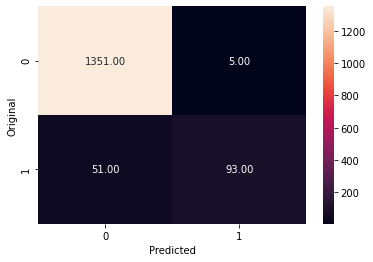

None


In [212]:
print("Confusion Matrix for KNN Model")
print(draw_cm(y_test, y_pred_knn))

In [213]:
print("Training set accuracy : ",accuracy_score(y_train,model_knn.predict(X_train)))
print("Test set accuracy : ",accuracy_score(y_test,y_pred_knn))

Training set accuracy :  0.9685714285714285
Test set accuracy :  0.9626666666666667


In [214]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.95      0.65      0.77       144

    accuracy                           0.96      1500
   macro avg       0.96      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [224]:
print("Roc Auc score : ",roc_auc_score(y_test, y_pred_knn))

Roc Auc score :  0.8210730088495576


**e. XGBoost Classifier**

Now, we use meta learner XGBoost Classifier for our Logistic Regression Model

In [216]:
meta = xgb.XGBClassifier(init=model, n_estimators=300)

meta.fit(X_train,y_train);


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [217]:
y_pred_xgb = meta.predict(X_test)

Confusion Matrix for XGBoost Classifier


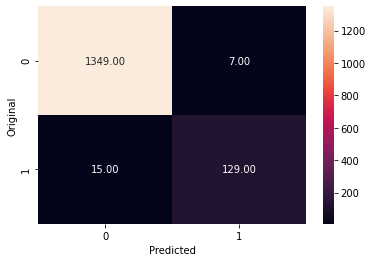

None


In [218]:
print("Confusion Matrix for XGBoost Classifier")
print(draw_cm(y_test, y_pred_xgb))

In [220]:
print("Training set accuracy : ",accuracy_score(y_train,meta.predict(X_train)))
print("Test set accuracy : ",accuracy_score(y_test,y_pred_xgb))

Training set accuracy :  0.9985714285714286
Test set accuracy :  0.9853333333333333


In [222]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.95      0.90      0.92       144

    accuracy                           0.99      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [223]:
print("Roc Auc score : ",roc_auc_score(y_test, y_pred_xgb))

Roc Auc score :  0.9453355457227139


XGBoost CLassifier has increased the accuracy of our Logistic Regression model from 95% to 99% for train data and 98% for test set.

# **Step 9 : Business Understanding**

**Aim :**  We have had to make a model that can predict the likelihood of a liability customer buying Personal Loan.

We have got a data of 5000 customers with 14 columns containing various informations about them.<br>

1. ID column being of no use in building the model is removed.
2. As Experience increases with age, so they both had a high correlation which is not required for our model. So Experience column was also removed.
3. ZIP Code was having a large number of categories which would increase burden on our model without helping much in our goal, hence it is also removed.
4. Our target variable - Personal Loan contains two classes, whether customer accepts loan(1) or not(0).
5. Income, CCAvg and Mortgage were right skewed, hence transformations were applied to normalise them.

After performing all these steps, we made various models.

Confusion Matrix


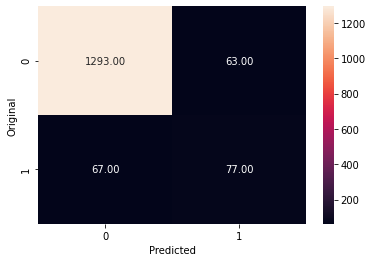

None


In [225]:
print("Confusion Matrix")
print(draw_cm(y_test, y_pred))

For efficient business working model, we need minimum values to fall into the **False Negative** Category of Confusion Matrix.

By False Negative we mean, our Original value is 1 and predicted value is 0, i.e., Originally the customer would have accepted the Loan but our model predicted that they won't. Such wrong prediction is harmful for the firm and hence we need minimum values to fall into it.

After applying XGBoost Classifier to our Logistic Regression Model we got accuracy of 99% on training set and 98% on test set. Also, we got the minimum False-Negative values i.e. only 15.

Hence, it proves to be the best model as per our requirement.

* People having income above 100$ are more likely to take loan.
* People not having Credit Card and Securities Account are observed to take loan more.
* People using Online Banking are also keen in taking loan.
